In [12]:
# import necessary libraries
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
#from  sklearn.metrics import mean_absolute_error

In [3]:
pip install prophet

                                              0.0/12.9 MB ? eta -:--:--
     -                                        0.6/12.9 MB 13.1 MB/s eta 0:00:01
     ----                                     1.4/12.9 MB 15.3 MB/s eta 0:00:01
     -------                                  2.4/12.9 MB 17.1 MB/s eta 0:00:01
     -----------                              3.7/12.9 MB 19.4 MB/s eta 0:00:01
     --------------                           4.7/12.9 MB 21.5 MB/s eta 0:00:01
     -----------------                        5.6/12.9 MB 21.1 MB/s eta 0:00:01
     -----------------                        5.7/12.9 MB 20.3 MB/s eta 0:00:01
     --------------------                     6.7/12.9 MB 18.7 MB/s eta 0:00:01
     ------------------------                 7.8/12.9 MB 19.1 MB/s eta 0:00:01
     ---------------------------              8.9/12.9 MB 19.6 MB/s eta 0:00:01
     ------------------------------           9.8/12.9 MB 19.6 MB/s eta 0:00:01
     --------------------------------        10.

In [5]:
pip install plotnine

                                              0.0/1.3 MB ? eta -:--:--
     ----------------------                   0.7/1.3 MB 22.5 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 16.0 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 16.0 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 8.9 MB/s eta 0:00:00
                                              0.0/73.7 kB ? eta -:--:--
     ---------------------------------------- 73.7/73.7 kB 4.2 MB/s eta 0:00:00
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
                                              0.0/9.2 MB ? eta -:--:--
     ----                                     1.1/9.2 MB 22.9 MB/s eta 0:00:01
     ---------                                2.3/9.2 MB 23.9 MB/s eta 0:00:01
     ----------------                         3.7/9.2 MB 26.5 MB/s eta 0:00:01
     ---------------------                    5.0/9.2 MB 26.6 MB/s eta 0:00:01
     -------------

In [10]:
pip install sklearn

In [14]:
df=pd.read_csv('sales_data.csv',encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df_1 = df.copy()

In [19]:
df_1=df_1[df_1.Quantity>0] 
df_1=df_1[df_1.UnitPrice>0]

In [21]:
df_1['ttp']= df_1['Quantity'] * df_1['UnitPrice']
df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ttp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [22]:
df_psp=df_1[['InvoiceDate','ttp']]

In [24]:
df_psp.rename(columns={'InvoiceDate':'ds','ttp':'y'},inplace=True)

In [25]:
df_psp

,ds,y
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
...,...,...
541904,2011-12-09 12:50:00,10.20
541905,2011-12-09 12:50:00,12.60
541906,2011-12-09 12:50:00,16.60
541907,2011-12-09 12:50:00,16.60


In [26]:
# 일 별 주문량으로 정리해 df 만들기

df_psp = df_psp.set_index('ds')

In [43]:
df_f1 = df_psp.resample('D')['y'].sum()

In [44]:
df_f1=df_f1.to_frame()

In [45]:
df_f1

,y
ds,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


<Axes: xlabel='ds'>

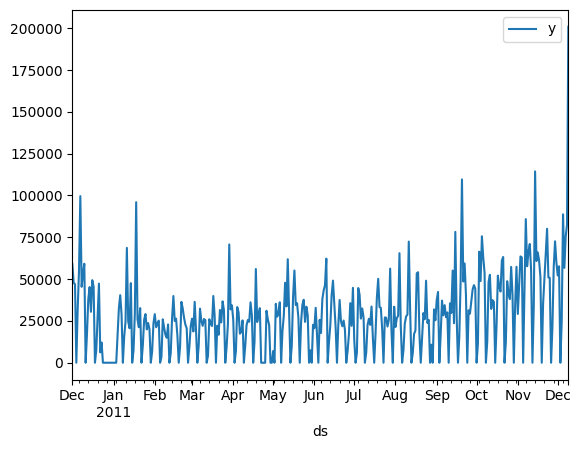

In [46]:
df_f1.plot()

In [47]:
df_f1.reset_index(inplace=True)

In [48]:
df_f1

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95
...,...,...
369,2011-12-05,88741.96
370,2011-12-06,56713.21
371,2011-12-07,75439.16
372,2011-12-08,82495.00


In [49]:
train = df_f1[:334]
test = df_f1[334:]

In [50]:
train

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95
...,...,...
329,2011-10-26,38059.43
330,2011-10-27,57291.72
331,2011-10-28,40565.70
332,2011-10-29,0.00


In [51]:
prophet=Prophet(daily_seasonality=True,
       growth='linear')
prophet.fit(train)

16:13:42 - cmdstanpy - INFO - Chain [1] start processing
16:13:43 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
#예측 기간
# 30일이면 한달, 4일이면 4
future = prophet.make_future_dataframe(periods=40) 
forecast = prophet.predict(future)

In [53]:
# 실제 예측값
ph_yhat = forecast[['ds','yhat']][334:]

In [54]:
ph_yhat

,ds,yhat
334,2011-10-31,38101.146577
335,2011-11-01,49030.056753
336,2011-11-02,40374.232069
337,2011-11-03,48026.420916
338,2011-11-04,38470.983356
339,2011-11-05,10115.857402
340,2011-11-06,23863.402198
341,2011-11-07,38671.615679
342,2011-11-08,49600.525855
343,2011-11-09,40944.701171


In [55]:
test

,ds,y
334,2011-10-31,57369.15
335,2011-11-01,29155.15
336,2011-11-02,45888.34
337,2011-11-03,63561.49
338,2011-11-04,62977.36
339,2011-11-05,0.00
340,2011-11-06,42946.34
341,2011-11-07,85881.81
342,2011-11-08,57700.24
343,2011-11-09,66127.57


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  29627.420289  11604.136748  47901.287150
1 2010-12-02  37151.963924  20687.371422  55116.017370
2 2010-12-03  27468.881150   9107.346506  44680.006394
3 2010-12-04  -1013.890017 -18792.713605  16160.775778
4 2010-12-05  12606.009566  -6020.220613  28636.517659


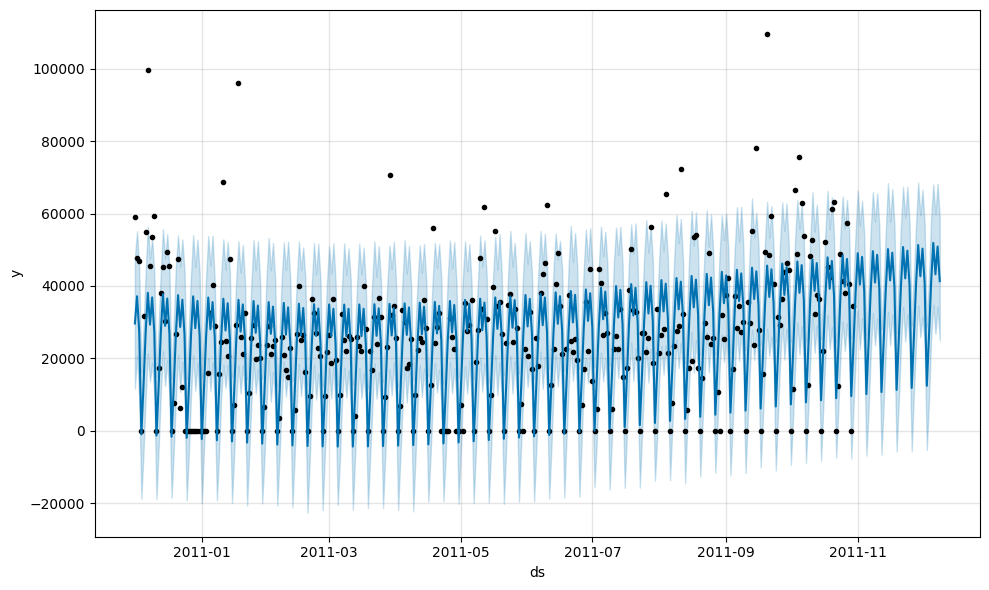

In [56]:
#forecast 시각화
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

#plot을 통한 시각화 
prophet.plot(forecast)
plt.show()

In [59]:
test

,ds,y
334,2011-10-31,57369.15
335,2011-11-01,29155.15
336,2011-11-02,45888.34
337,2011-11-03,63561.49
338,2011-11-04,62977.36
339,2011-11-05,0.00
340,2011-11-06,42946.34
341,2011-11-07,85881.81
342,2011-11-08,57700.24
343,2011-11-09,66127.57


In [60]:
ph_yhat

,ds,yhat
334,2011-10-31,38101.146577
335,2011-11-01,49030.056753
336,2011-11-02,40374.232069
337,2011-11-03,48026.420916
338,2011-11-04,38470.983356
339,2011-11-05,10115.857402
340,2011-11-06,23863.402198
341,2011-11-07,38671.615679
342,2011-11-08,49600.525855
343,2011-11-09,40944.701171


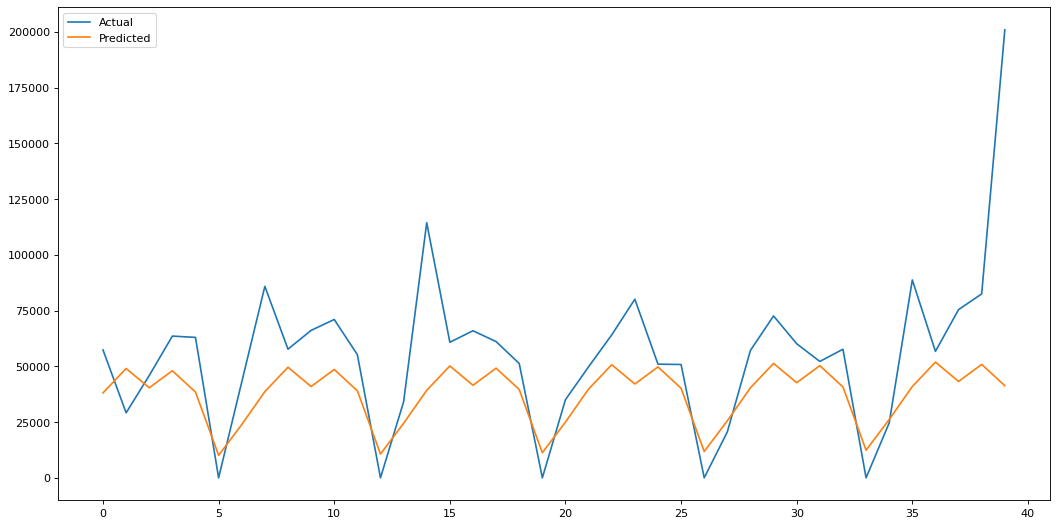

In [61]:
# 실제값과 예측값 비교하여 트랜드 알아보기

from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

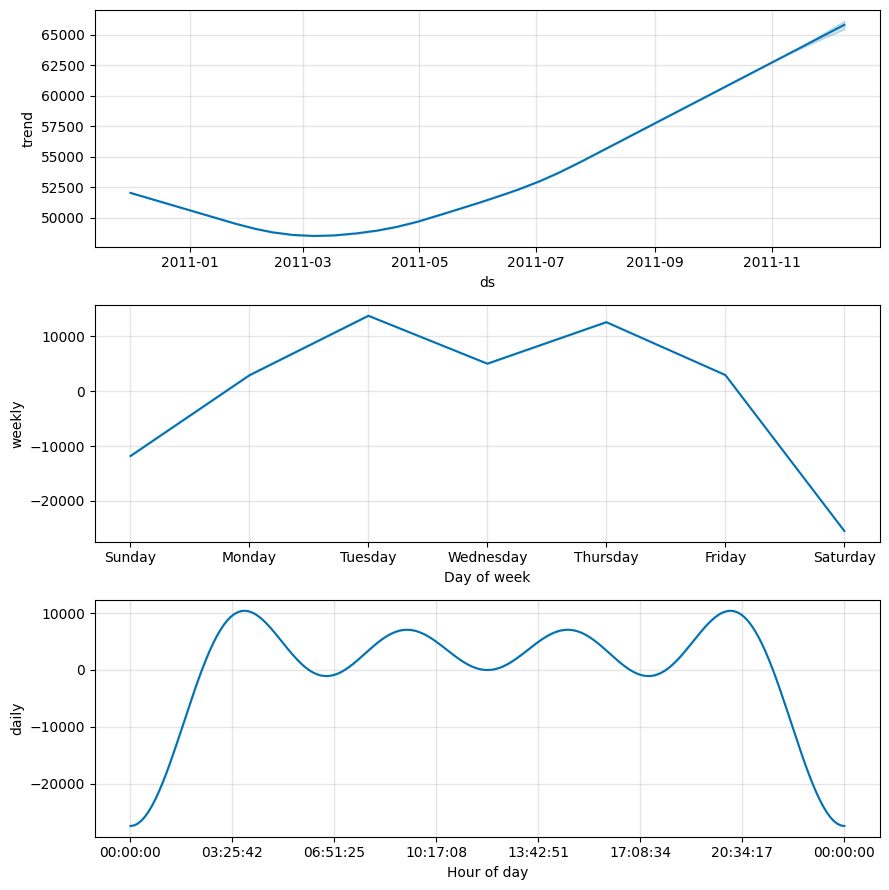

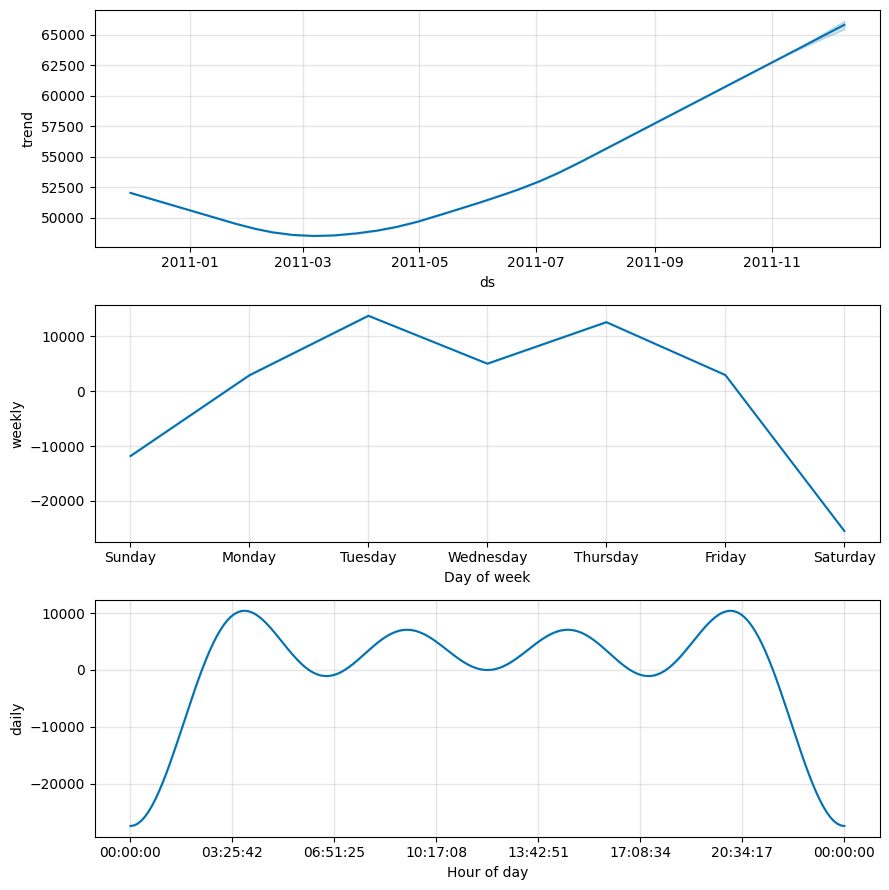

In [62]:
# 요일에 대한 트랜드
prophet.plot_components(forecast)

In [63]:
pip install finance-datareader

                                              0.0/3.8 MB ? eta -:--:--
     ---------                                0.9/3.8 MB 27.7 MB/s eta 0:00:01
     ------------                             1.2/3.8 MB 19.0 MB/s eta 0:00:01
     ----------------------                   2.1/3.8 MB 22.1 MB/s eta 0:00:01
     ----------------------                   2.1/3.8 MB 22.1 MB/s eta 0:00:01
     -----------------------                  2.2/3.8 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 15.0 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 12.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
import FinanceDataReader as fdr

In [65]:
fdr.StockListing('KRX')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,1,1300,1.83,71700,72200,71600,12161798,874631186600,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,588000,1,4000,0.68,588000,591000,586000,155137,91268049000,137592000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,110300,3,0,0.00,111000,112700,109200,3991904,442052991272,80298660859500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,785000,2,-3000,-0.38,796000,796000,783000,40298,31719391000,55871590000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,721000,1,34000,4.95,693000,724000,688000,346407,246275074638,50897079303000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,288490,KR7288490006,나라소프트,KONEX,일반기업부,59,1,1,1.72,61,61,55,58155,3350807,2250673000,38147000,KNX
2717,322190,KR7322190000,베른,KONEX,일반기업부,145,3,0,0.00,150,150,135,16748,2277467,1294153565,8925197,KNX
2718,281310,KR7281310003,바이오시네틱스,KONEX,일반기업부,480,1,100,26.32,409,480,370,22633,9575457,1272427200,2650890,KNX
2719,308700,KR7308700004,테크엔,KONEX,일반기업부,270,1,6,2.27,0,0,0,0,0,1080000000,4000000,KNX


In [67]:
fdr.DataReader('000660')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-19,302374,309246,292065,306496,959890,NaN
1999-02-22,295501,303748,295501,298250,494550,-0.026904
1999-02-23,302374,306497,296876,302373,738630,0.013824
1999-02-24,305122,307871,298250,298250,578790,-0.013635
1999-02-25,295501,301686,292753,296875,531510,-0.004610
...,...,...,...,...,...,...
2023-05-26,107500,110500,106100,109200,10136706,0.055072
2023-05-30,113200,113400,109500,110300,9058509,0.010073
2023-05-31,110000,110900,108500,108600,8166685,-0.015413
